# LaminDB commands

1) login via CLI `lamin login tim.treis@helmholtz-munich.de --key=c5Kcr13I7SAN-DbFtCMVoyGf_BySFASj5wwwTLN6`
2) load instance in jupyter nb `!lamin load scverse/spatial`

In [1]:
!lamin load scverse/spatial

💡 connected lamindb: scverse/spatial


In [2]:
import lamindb as ln


💡 connected lamindb: scverse/spatial
❗ Full backed capabilities are not available for this version of anndata, please install anndata>=0.9.1.


In [37]:
a = ln.Artifact.filter(ulabels__name="4pey9").one()
a

Artifact(uid='XOU0uuOhDRzwNzKl5gdt', suffix='.spatialdata.zarr', description='10X, Visium, Mouse, Brain', size=60402054, hash='pmkxJJnM2aX2a-LZW9BPCQ', hash_type='md5-d', n_objects=331, visibility=1, key_is_virtual=True, updated_at=2024-05-08 20:58:30 UTC, storage_id=2, transform_id=32, run_id=106, created_by_id=7)

In [95]:
for n in a.feature_sets.first().features.df().name:
    getattr(a, n)

AttributeError: 'Artifact' object has no attribute 'tissue'

In [110]:
a.labels.get(organism)


NameError: name 'organism' is not defined

In [61]:
dir(a.features)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessor_by_orm',
 '_add_from',
 '_feature_set_by_slot',
 '_host',
 'add',
 'add_feature_set',
 'add_from_anndata',
 'add_from_df',
 'add_from_mudata']

In [33]:
l = ln.ULabel(name="validation status", description="validation status").save()

❗ loaded ULabel record with same name: 'validation status' (disable via `ln.settings.upon_create_search_names`)


In [31]:
l

ULabel(uid='QSBKIARR', name='validation_status', description='validation status', updated_at=2024-05-08 20:49:00 UTC, created_by_id=7)

In [27]:
l = ln.ULabel.lookup()

In [29]:
l.validation_status.delete()

(1, {'lnschema_core.ULabel': 1})

In [13]:
ln.Feature(name="organ", type="category").save()

❗ loaded Feature record with same name: 'organ' (disable via `ln.settings.upon_create_search_names`)


In [17]:
artifact = ln.Artifact(
    "/lustre/groups/ml01/projects/2024_spatialdata_db/data/4pey9__10X__Visium__Mouse__brain__20200623__v1.1.0/4pey9__10X__Visium__Mouse__brain__20200623__v1.1.0.zarr"
)
artifact

❗ no run & transform get linked, consider calling ln.track()


ValueError: Pass one of key, run or description as a parameter

In [4]:
import lamindb as ln
ln.track() # required for uploading from notebook, notebook is now tracked

💡 connected lamindb: scverse/spatial


MissingTransformSettings: To track this notebook, set

ln.settings.transform.stem_uid = "ArfCWszSr3ua"
ln.settings.transform.version = "1"


/home/icb/tim.treis/miniconda/envs/lamin/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
ln.settings.transform.stem_uid = "ArfCWszSr3ua"
ln.settings.transform.version = "1"
ln.settings.verbosity = "hint"

### upload a file

In [14]:
viz = ln.Artifact("./visium_hd_3.0.0_io.zarr/")
viz.save() # transfers to S3

❗ returning existing artifact with same hash: Artifact(uid='6xKC42K5Bw67KKbbvSlG', suffix='.zarr', size=2846253969, hash='a6TMu1CRzwxtdKCyEX1EXw', hash_type='md5-d', n_objects=13109, visibility=1, key_is_virtual=True, updated_at=2024-04-03 14:05:23 UTC, storage_id=2, transform_id=6, run_id=6, created_by_id=7)


### get overview of files

In [1]:
ln.Artifact.df() # everything not deleted or internal

NameError: name 'ln' is not defined

In [32]:
ln.Artifact.filter(visibility=0).df() # internal

,uid,storage_id,key,suffix,accessor,description,version,size,hash,hash_type,n_objects,n_observations,transform_id,run_id,visibility,key_is_virtual,created_at,updated_at,created_by_id
id,,,,,,,,,,,,,,,,,,,
14,7Txb5gsqjUqAlmR1BZDi,2,None,.ipynb,None,Source of transform BZhZQ6uIbkWv5zKv,1,6558,1xNGqI47cCOOTs5GrJHYPw,md5,None,None,None,None,0,True,2024-04-02 13:49:15.684235+00:00,2024-04-02 13:49:15.684258+00:00,2
15,LuG4o3PlTdU5ZuWH030C,2,None,.txt,None,requirements.txt,None,11169,3dbc7J0YgFgE6bJWETQ8WA,md5,None,None,None,None,0,True,2024-04-02 13:49:15.900050+00:00,2024-04-02 13:49:15.900064+00:00,2
16,GvuYgPO5D86xKjBKDvAe,2,None,.html,None,Report of run 07OjsC33GASKEEOGiwZ4,None,292608,NiyNDnFN9PvD7yAtCx7WvQ,md5,None,None,None,None,0,True,2024-04-02 13:49:16.028203+00:00,2024-04-02 13:49:16.028213+00:00,2
18,uOM8vBTTl3u72Ayyr6or,2,None,.ipynb,None,Source of transform VwUYGOmA3koC5zKv,1,7075,FgCYOWndvHWzo9qudl-Ciw,md5,None,None,None,None,0,True,2024-04-02 14:01:23.957096+00:00,2024-04-02 14:01:23.957134+00:00,2
19,xGaILnIF0wJNiu6Eixf7,2,None,.html,None,Report of run AqNSZq9oQrHW3gXGELlj,None,297779,dksFE6F1YZ8MezLcNMrQ1g,md5,None,None,None,None,0,True,2024-04-02 14:01:24.183404+00:00,2024-04-02 14:01:24.183416+00:00,2
21,oNG1pzctoZ9ZyuDWJ76Z,2,None,.ipynb,None,Source of transform rpZiIyj0syL25zKv,1,1767,NSCkG9rwFsmPXtEJkcqlww,md5,None,None,None,None,0,True,2024-04-02 20:22:19.842728+00:00,2024-04-02 20:22:19.842750+00:00,3
22,wlA36GM3TTQzzBJjN8j7,2,None,.txt,None,requirements.txt,None,18170,6nkOtk0cOVcDQYU6nLkIww,md5,None,None,None,None,0,True,2024-04-02 20:22:21.135196+00:00,2024-04-02 20:22:21.135211+00:00,3
23,2UfCveAdQiXkQ9OLKDHr,2,None,.html,None,Report of run ohqAkFcQlBWsPpu8zz1S,None,279514,BOToRDxPkHRUlyJHbdYNdQ,md5,None,None,None,None,0,True,2024-04-02 20:22:21.770914+00:00,2024-04-02 20:22:21.770943+00:00,3


In [33]:
ln.Artifact.filter(visibility=-1).df() # trash

,uid,storage_id,key,suffix,accessor,description,version,size,hash,hash_type,n_objects,n_observations,transform_id,run_id,visibility,key_is_virtual,created_at,updated_at,created_by_id
id,,,,,,,,,,,,,,,,,,,
24,6xKC42K5Bw67KKbbvSlG,2,None,.zarr,None,None,None,2846253969,a6TMu1CRzwxtdKCyEX1EXw,md5-d,13109,None,6,6,-1,True,2024-04-03 14:05:23.601640+00:00,2024-04-03 14:26:02.557270+00:00,7


### delete a file

In [ ]:
viz = ln.Artifact.filter(uid="6xKC42K5Bw67KKbbvSlG")
viz.delete() # sets visibility to -1, infinite retention

## Associate metadata

In [39]:
a = ln.Artifact("./visium_hd_3.0.0_io.zarr/").restore() # because it was in trash

❗ returning existing artifact with same hash(from trash): Artifact(uid='6xKC42K5Bw67KKbbvSlG', suffix='.zarr', size=2846253969, hash='a6TMu1CRzwxtdKCyEX1EXw', hash_type='md5-d', n_objects=13109, visibility=-1, key_is_virtual=True, updated_at=2024-04-03 14:56:25 UTC, storage_id=2, transform_id=6, run_id=6, created_by_id=7)


In [25]:
DATASET_PATH = "/lustre/groups/ml01/projects/2024_spatialdata_db/data/4pey9__10X__Visium__Mouse__brain__20200623__v1.1.0/4pey9__10X__Visium__Mouse__brain__20200623__v1.1.0.zarr"

artifact = ln.Artifact(DATASET_PATH)

❗ no run & transform get linked, consider calling ln.track()


ValueError: Pass one of key, run or description as a parameter

In [18]:
features = ln.Feature.lookup()


In [30]:
features.organism.

'bionty.Organism'

In [24]:
bionty_organism = ln.Feature.filter(name="organism").one()

Feature(uid='wCbvLeKe2rv8', name='organism', type='category', registries='bionty.Organism', updated_at=2024-04-02 10:00:15 UTC, created_by_id=2)

In [4]:
import spatialdata as sd
import spatialdata_plot

In [2]:
sdata = sd.read_zarr("/lustre/groups/ml01/projects/2024_spatialdata_db/data/4pey9__10X__Visium__Mouse__brain__20200623__v1.1.0/4pey9__10X__Visium__Mouse__brain__20200623__v1.1.0.zarr")

In [6]:
sdata

SpatialData object with:
├── Images
│     ├── 'Visium_Adult_Mouse_Brain_full_image': MultiscaleSpatialImage[cyx] (3, 2000, 1921), (3, 1000, 960), (3, 500, 480), (3, 250, 240), (3, 125, 120)
│     ├── 'Visium_Adult_Mouse_Brain_hires_image': SpatialImage[cyx] (3, 2000, 1921)
│     └── 'Visium_Adult_Mouse_Brain_lowres_image': SpatialImage[cyx] (3, 600, 576)
├── Shapes
│     └── 'Visium_Adult_Mouse_Brain': GeoDataFrame shape: (2702, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (2702, 32285)
with coordinate systems:
▸ 'downscaled_hires', with elements:
        Visium_Adult_Mouse_Brain_hires_image (Images), Visium_Adult_Mouse_Brain (Shapes)
▸ 'downscaled_lowres', with elements:
        Visium_Adult_Mouse_Brain_lowres_image (Images), Visium_Adult_Mouse_Brain (Shapes)
▸ 'global', with elements:
        Visium_Adult_Mouse_Brain_full_image (Images), Visium_Adult_Mouse_Brain (Shapes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


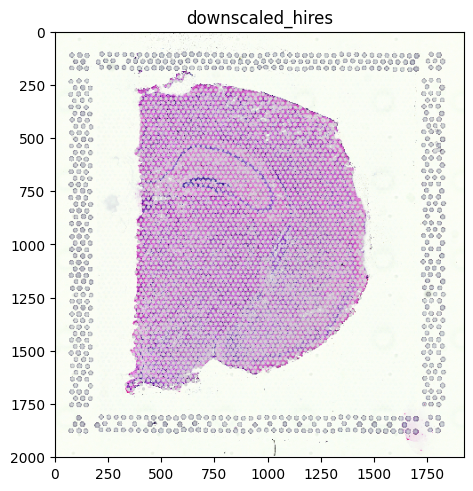

In [9]:
sdata.pl.render_images().pl.render_shapes().pl.show("downscaled_hires")

In [13]:
# ADJUST
uid = "4pey9"

# Setup before running this script for the first time
#   1) Ensure you have a lamin.ai account
#   2) Run `lamin login` to authenticate
#   3) Activate lamin db connection with `lamin load scverse/spatial`
#   4) Execute script once and replace the stem_uid for this file

import lamindb as ln
ln.settings.transform.stem_uid = "GyGSYnFlk56j"
ln.settings.transform.version = "1"

ln.track()

OperationalError: could not translate host name "database-server-theislab.ciwirckhwtkd.eu-central-1.rds.amazonaws.com" to address: Name or service not known


In [11]:
import bionty as bt

feature_lo = ln.Feature.lookup()
organism_lo = bt.Organism.public().lookup()


OperationalError: could not translate host name "database-server-theislab.ciwirckhwtkd.eu-central-1.rds.amazonaws.com" to address: Name or service not known


In [ ]:
tissue_lo = bt.Tissue.public().lookup()